## Part I

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the data 

In [4]:
from zipfile import ZipFile

In [5]:
file_name = '/content/drive/MyDrive/Colab Notebooks/Project/Dataset - Plant-seedlings-classification.zip'

In [6]:
project_path = '/content/drive/MyDrive/Colab Notebooks/Project/Extracted/'

In [7]:
!ls -l drive/MyDrive/'Colab Notebooks'/Project/

total 1772339
-r-------- 1 root root    1327886 Jan  6 05:58 'Dataset - Images.zip'
-r-------- 1 root root 1810679877 Jan  7 10:59 'Dataset - Plant-seedlings-classification.zip'
drwx------ 2 root root       4096 Mar 14 08:32  Extracted
-rw------- 1 root root        151 Feb 28 13:17 'Part II - Question & Answer.gdoc'
-rw------- 1 root root      21933 Mar 14 12:35 'Project 1.ipynb'
-rw------- 1 root root    2839202 Feb 27 14:42  project_2.ipynb


In [8]:
!rm -r drive/MyDrive/'Colab Notebooks'/Project/Extracted

In [9]:
!ls -l drive/MyDrive/'Colab Notebooks'/Project/

total 1772337
-r-------- 1 root root    1327886 Jan  6 05:58 'Dataset - Images.zip'
-r-------- 1 root root 1810679877 Jan  7 10:59 'Dataset - Plant-seedlings-classification.zip'
-rw------- 1 root root        151 Feb 28 13:17 'Part II - Question & Answer.gdoc'
-rw------- 1 root root      24010 Mar 14 12:35 'Project 1.ipynb'
-rw------- 1 root root    2839202 Feb 27 14:42  project_2.ipynb


In [10]:
with ZipFile(file_name, 'r') as zip:
    print("Extracting all the files now...")
    zip.extractall('/content/drive/MyDrive/Colab Notebooks/Project/Extracted')
    print('Done')

Extracting all the files now...
Done


In [11]:
!ls -local

total 20
drwxr-xr-x 1 root 4096 Mar 14 12:35 .
drwxr-xr-x 1 root 4096 Mar 14 12:35 ..
drwxr-xr-x 4 root 4096 Mar 11 15:16 .config
drwx------ 5 root 4096 Mar 14 12:35 drive
drwxr-xr-x 1 root 4096 Mar 11 15:16 sample_data


In [12]:
import os
os.chdir(project_path)

In [13]:
os.listdir()

['sample_submission.csv', 'test', 'train']

In [14]:
os.chdir(project_path + '/train/')
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [15]:
import cv2
X_train = []
y_train = []

for i in os.listdir():
    print(i)
    for j in os.listdir(i):
        temp = cv2.imread(project_path + '/train/'+ i + '/' + j)
        temp = cv2.resize(temp, (28, 28))
        X_train.append(temp)
        y_train.append(i)

Black-grass
Charlock
Cleavers
Common Chickweed
Common wheat
Fat Hen
Loose Silky-bent
Maize
Scentless Mayweed
Shepherds Purse
Small-flowered Cranesbill
Sugar beet


### Visualization

[4270, 1845, 682, 2211, 3570, 4322, 1656, 2149, 1342, 3706]


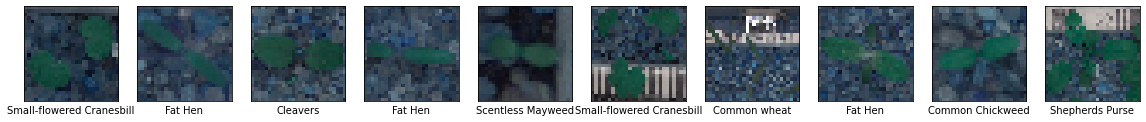

In [16]:
import random
num_list = []
for i in range(0, 10):
    range_num = random.randint(0, 4750)
    num_list.append(range_num)
print(num_list)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 15)
num = 0
for i in num_list:
    plt.subplot(1, 10,  num + 1)
    num += 1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])

In [17]:
X_train[7].shape

(28, 28, 3)

In [18]:
import numpy as np

In [19]:
X_train_data = np.asarray(X_train, dtype = np.float32)
X_train_data.shape

(4750, 28, 28, 3)

In [20]:
import pandas as pd
y_train_data = pd.get_dummies(y_train)

In [21]:
y_train_data = np.asarray(y_train_data)
y_train_data.shape

(4750, 12)

In [22]:
X_train_data.shape

(4750, 28, 28, 3)

In [23]:
X_train_data = X_train_data / 255

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, random_state = 3, 
                                                    stratify = y_train_data, test_size = 0.2)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3800, 28, 28, 3)
(3800, 12)
(950, 28, 28, 3)
(950, 12)


In [26]:
X_train_sup = X_train.reshape(3800, 28*28*3)
X_test_sup = X_test.reshape(950, 28*28*3)

### Training 

### Supervised Model 

#### Decision Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier(max_depth = 12, min_samples_split = 2, min_samples_leaf = 1)
dt.fit(X_train_sup, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
print("Training score:-", dt.score(X_train_sup, y_train))
print("Testing Score:-", dt.score(X_test_sup, y_test))

Training score:- 0.6752631578947368
Testing Score:- 0.24526315789473685


#### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sup, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
print('Training Score:-', knn.score(X_train_sup, y_train))
print('Test Score:-', knn.score(X_test_sup, y_test))

Training Score:- 0.3918421052631579
Test Score:- 0.1631578947368421


### Deep Learning 

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras import Input
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

#### DNN 

In [34]:
tf.keras.backend.clear_session()
model = Sequential()

model.add(Flatten(input_shape = (28, 28, 3)))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'he_normal'))

model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))

model.add(Dense(50, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(150, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.4))

model.add(Dense(12, activation = 'softmax'))

In [35]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, min_delta = 0.01)
adam = optimizers.Adam(lr = 0.009)

model.compile(loss = 'categorical_crossentropy', metrics = 'acc', optimizer = adam)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2352)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                117650    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_4 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0

In [36]:
model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/100
95/95 [==============================] - 4s 8ms/step - loss: 2.6855 - acc: 0.1275 - val_loss: 2.4289 - val_acc: 0.1237
Epoch 2/100
95/95 [==============================] - 0s 3ms/step - loss: 2.4167 - acc: 0.1371 - val_loss: 2.4198 - val_acc: 0.1474
Epoch 3/100
95/95 [==============================] - 0s 4ms/step - loss: 2.4127 - acc: 0.1366 - val_loss: 2.4217 - val_acc: 0.1474
Epoch 4/100
95/95 [==============================] - 0s 3ms/step - loss: 2.4252 - acc: 0.1292 - val_loss: 2.4195 - val_acc: 0.1474


In [37]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 2.4169 - acc: 0.1379


[2.4169387817382812, 0.13789473474025726]

### CNN

In [38]:
tf.keras.backend.clear_session()
model = Sequential()

model.add(Input(shape = (224, 224, 3)))
model.add(Conv2D(64, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(256, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size = (3,3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size = (2,2), kernel_initializer = 'he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(12, activation = 'softmax'))

In [39]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 64)      832       
_________________________________________________________________
batch_normalization (BatchNo (None, 223, 223, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 223, 223, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      16448     
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 221, 221, 64)      1

In [40]:
img_size = 224
img_depth = 3

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
datagen = ImageDataGenerator(rotation_range=30,
                                  width_shift_range=0.07, 
                                  height_shift_range=0.07,
                                  zoom_range=0.04, 
                                  horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale = 1./255,
                                  brightness_range=[0.6,1.0],
                                  validation_split=0.2)

In [43]:
train_datagen1 = datagen.flow_from_directory(project_path + '/train/',
                                                    target_size = (img_size, img_size),
                                                    subset = 'training',
                                                    batch_size = 64)

test_datagen1 = datagen.flow_from_directory(project_path + '/train/',
                                                  target_size = (img_size, img_size),
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 3803 images belonging to 12 classes.
Found 947 images belonging to 12 classes.


In [44]:
model.fit(train_datagen1, steps_per_epoch = 3803//64, epochs = 15, validation_data = test_datagen1, validation_steps = 947//64)

Epoch 1/15
59/59 [==============================] - 162s 2s/step - loss: 2.0675 - acc: 0.3248 - val_loss: 7.3298 - val_acc: 0.1384
Epoch 2/15
59/59 [==============================] - 123s 2s/step - loss: 0.8659 - acc: 0.6852 - val_loss: 9.1673 - val_acc: 0.1384
Epoch 3/15
59/59 [==============================] - 123s 2s/step - loss: 0.6138 - acc: 0.7873 - val_loss: 8.7357 - val_acc: 0.1496
Epoch 4/15
59/59 [==============================] - 120s 2s/step - loss: 0.4784 - acc: 0.8281 - val_loss: 5.8062 - val_acc: 0.1518
Epoch 5/15
59/59 [==============================] - 122s 2s/step - loss: 0.4648 - acc: 0.8323 - val_loss: 4.5904 - val_acc: 0.2042
Epoch 6/15
59/59 [==============================] - 122s 2s/step - loss: 0.4354 - acc: 0.8401 - val_loss: 2.7931 - val_acc: 0.3471
Epoch 7/15
59/59 [==============================] - 121s 2s/step - loss: 0.3671 - acc: 0.8625 - val_loss: 1.6481 - val_acc: 0.5525
Epoch 8/15
59/59 [==============================] - 121s 2s/step - loss: 0.3607 - a

In [45]:
adam_lr = tf.keras.optimizers.Adam(lr = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam_lr, metrics = ['acc'])

In [46]:
model.fit(train_datagen1, steps_per_epoch = 3803//64, epochs = 20, initial_epoch = 15, validation_data = test_datagen1, validation_steps = 947//64)

Epoch 16/20
59/59 [==============================] - 125s 2s/step - loss: 0.2061 - acc: 0.9230 - val_loss: 0.2781 - val_acc: 0.9219
Epoch 17/20
59/59 [==============================] - 122s 2s/step - loss: 0.1412 - acc: 0.9510 - val_loss: 0.2340 - val_acc: 0.9308
Epoch 18/20
59/59 [==============================] - 121s 2s/step - loss: 0.1595 - acc: 0.9374 - val_loss: 0.2136 - val_acc: 0.9420
Epoch 19/20
59/59 [==============================] - 121s 2s/step - loss: 0.1380 - acc: 0.9517 - val_loss: 0.2333 - val_acc: 0.9408
Epoch 20/20
59/59 [==============================] - 121s 2s/step - loss: 0.1293 - acc: 0.9538 - val_loss: 0.2182 - val_acc: 0.9408


In [47]:
adam_lr = tf.keras.optimizers.Adam(lr = 0.00001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam_lr, metrics = ['acc'])

In [48]:
model.fit(train_datagen1, steps_per_epoch = 3803//64, epochs = 25, initial_epoch = 20, validation_data = test_datagen1, validation_steps = 947//64)

Epoch 21/25
59/59 [==============================] - 124s 2s/step - loss: 0.1331 - acc: 0.9556 - val_loss: 0.2155 - val_acc: 0.9487
Epoch 22/25
59/59 [==============================] - 122s 2s/step - loss: 0.1164 - acc: 0.9612 - val_loss: 0.2030 - val_acc: 0.9453
Epoch 23/25
59/59 [==============================] - 121s 2s/step - loss: 0.1148 - acc: 0.9607 - val_loss: 0.2215 - val_acc: 0.9431
Epoch 24/25
59/59 [==============================] - 122s 2s/step - loss: 0.1166 - acc: 0.9593 - val_loss: 0.2136 - val_acc: 0.9475
Epoch 25/25
59/59 [==============================] - 121s 2s/step - loss: 0.1329 - acc: 0.9514 - val_loss: 0.2044 - val_acc: 0.9509


In [49]:
adam_lr = tf.keras.optimizers.Adam(lr = 0.000001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam_lr, metrics = ['acc'])

In [50]:
model.fit(train_datagen1, steps_per_epoch = 3803//64, epochs = 30, initial_epoch = 25, validation_data = test_datagen1, validation_steps = 947//64)

Epoch 26/30
59/59 [==============================] - 124s 2s/step - loss: 0.1035 - acc: 0.9664 - val_loss: 0.2013 - val_acc: 0.9408
Epoch 27/30
59/59 [==============================] - 121s 2s/step - loss: 0.1080 - acc: 0.9573 - val_loss: 0.2043 - val_acc: 0.9420
Epoch 28/30
59/59 [==============================] - 121s 2s/step - loss: 0.1031 - acc: 0.9611 - val_loss: 0.2103 - val_acc: 0.9475
Epoch 29/30
59/59 [==============================] - 121s 2s/step - loss: 0.0967 - acc: 0.9685 - val_loss: 0.2045 - val_acc: 0.9509
Epoch 30/30
59/59 [==============================] - 120s 2s/step - loss: 0.1091 - acc: 0.9606 - val_loss: 0.2020 - val_acc: 0.9464


In [51]:
model.fit(train_datagen1, steps_per_epoch = 3803//64, epochs = 35, initial_epoch = 30, validation_data = test_datagen1, validation_steps = 947//64)

Epoch 31/35
59/59 [==============================] - 122s 2s/step - loss: 0.1042 - acc: 0.9663 - val_loss: 0.2098 - val_acc: 0.9420
Epoch 32/35
59/59 [==============================] - 121s 2s/step - loss: 0.1065 - acc: 0.9628 - val_loss: 0.2191 - val_acc: 0.9475
Epoch 33/35
59/59 [==============================] - 121s 2s/step - loss: 0.1017 - acc: 0.9636 - val_loss: 0.1975 - val_acc: 0.9498
Epoch 34/35
59/59 [==============================] - 121s 2s/step - loss: 0.1051 - acc: 0.9620 - val_loss: 0.2293 - val_acc: 0.9397
Epoch 35/35
59/59 [==============================] - 120s 2s/step - loss: 0.1105 - acc: 0.9610 - val_loss: 0.1995 - val_acc: 0.9475


In [53]:
model.save('project1.h5')

### Observation

We've used three image classifier models. First, supervised technique (DT & KNN) - it's not suitable for the image processing problem. It gave the worst accuracy [DT - 0.24526315789473685, KNN - 0.1631578947368421]. Next, DNN - as we don't know how many dense layers to use to get good performance. It also didn't give a good score [0.13789473474025726]. And last, CNN - right algorithm for the image classifier. By adding more layers of Conv., we've achieved an excellent score [0.9475], however, it's little overfitting, but it's negligible. So for this dataset, CNN is by far the most suitable algorithm.

### Prediction

In [131]:
os.listdir()

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [132]:
list_1 = []
for i in os.listdir():
    list_1.append(i)

In [133]:
import pandas as pd
list_2 = pd.DataFrame(list_1)

In [134]:
class_names = list_2[0].unique().tolist()

In [135]:
!ls -b

Black-grass  Common\ Chickweed	Loose\ Silky-bent   Shepherds\ Purse
Charlock     Common\ wheat	Maize		    Small-flowered\ Cranesbill
Cleavers     Fat\ Hen		Scentless\ Mayweed  Sugar\ beet


In [136]:
ls 'Sugar beet'/

0026b7a30.png  3112fb5d7.png  6bb2545d9.png  9360888bb.png  d41a8cb93.png
00626e3be.png  31e905346.png  6cd16cd21.png  94063c53d.png  d41b1916c.png
008753052.png  3217c1887.png  6d18daabd.png  96a82a2a2.png  d42bcf4bd.png
00acffa82.png  33ddbf2cc.png  6d579671c.png  96dfb46de.png  d4998deee.png
019e2ca3b.png  341823a91.png  6d623072a.png  978de5160.png  d4aec4bee.png
01f145914.png  344371cbf.png  6d63eb98f.png  979a39f22.png  d4db82d2c.png
02460681c.png  34651cf34.png  6d99bec4e.png  98e87074b.png  d558ea002.png
04c979351.png  35bccf6c9.png  6ed387106.png  99926b786.png  d585fe0c7.png
05f87cff9.png  3767ec44e.png  6f0536b55.png  999f75899.png  d5d014036.png
06a859dfd.png  3905347ff.png  6fe5df5b7.png  99a9b1567.png  d5d909ed5.png
071c8beda.png  399e9c2a3.png  700889031.png  9a8bb2fff.png  d62099b5b.png
0838d0a77.png  39d5d935a.png  702261484.png  9af73f331.png  d63de4d6b.png
089859249.png  3b3c71f04.png  7162a91f1.png  9bdf9ba7d.png  d7b6e4654.png
095ba8b9d.png  3b5b81454.png  71b1b671

In [137]:
from tensorflow.keras.preprocessing import image

In [138]:
img_load = image.load_img(project_path + '/train/' + '/Sugar beet/ffa401155.png')

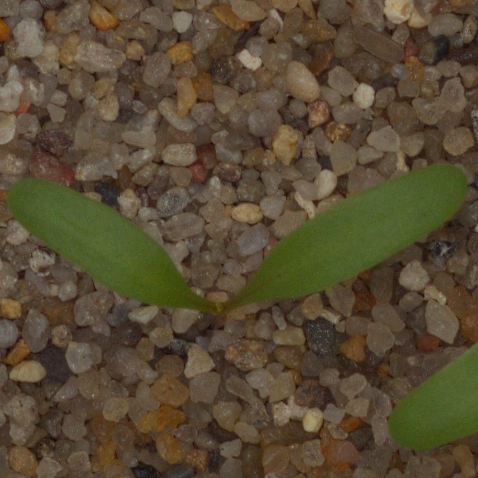

In [139]:
img_load

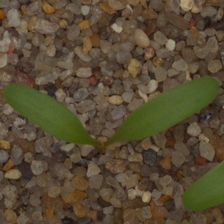

In [140]:
img_size = img_load.resize((224, 224))
img_size

In [141]:
img_arr = image.img_to_array(img_size)
img_arr.shape

(224, 224, 3)

In [142]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [143]:
img_arr123 = tf.expand_dims(img_arr, axis = 0)

In [144]:
img_arr1234 = test_datagen.flow(img_arr123, batch_size = 1)

In [145]:
pred = model.predict(img_arr1234)

In [146]:
pred

array([[4.4670850e-07, 6.4737680e-05, 6.3082990e-07, 1.9046388e-07,
        1.4469518e-06, 1.6607390e-07, 5.1950195e-08, 2.3471537e-05,
        9.2381748e-07, 1.9720287e-06, 1.0646808e-07, 9.9990582e-01]],
      dtype=float32)

In [147]:
tf.argmax(pred[0])

<tf.Tensor: shape=(), dtype=int64, numpy=11>

In [148]:
class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [149]:
pred_temp = class_names[tf.argmax(pred[0])]
pred_temp

'Sugar beet'

In [150]:
train_datagen1.class_indices

{'Black-grass': 0,
 'Charlock': 1,
 'Cleavers': 2,
 'Common Chickweed': 3,
 'Common wheat': 4,
 'Fat Hen': 5,
 'Loose Silky-bent': 6,
 'Maize': 7,
 'Scentless Mayweed': 8,
 'Shepherds Purse': 9,
 'Small-flowered Cranesbill': 10,
 'Sugar beet': 11}

In [151]:
def prediction_test_images(img):
  load_img_temp = image.load_img(img)
  resz_load_img = load_img_temp.resize((224, 224))
  img_arr_temp = image.img_to_array(resz_load_img)
  img_arr_temp2 = tf.expand_dims(img_arr_temp, axis = 0)
  img_gen_pred = test_datagen.flow(img_arr_temp2, batch_size = 1)
  pred_test_temp = model.predict(img_gen_pred)
  pred_test = class_names[tf.argmax(pred_test_temp[0])]
  return pred_test

In [152]:
folder_path = project_path + '/test/'

In [153]:
pred_temp_img = []
pred_temp_img_label = []
for i in os.listdir(folder_path):
  pred_test_label = prediction_test_images(folder_path + i)
  pred_temp_img.append(i)
  pred_temp_img_label.append(pred_test_label)

In [154]:
data = {'file' : pred_temp_img, 
        'species': pred_temp_img_label}

In [155]:
import pandas as pd
df = pd.DataFrame(data)

In [156]:
df.head()

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet


In [157]:
df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Project/Plants Prediction.csv', index = False)

## Part II 

Q. Explain in depth why CNN out performs neural networks which in turn out perform supervised learning models when it comes to image classification.

A. The CNN is the most popular model for image classifier/recognition in Deep Learning. The model is inspired by human visual perception, which works in hierarchical orders. Even with using fewer layers, we can get valid outcomes. In contrast, supervised learning models usually operate well on numerical/statistical data, for image classification, it's not the greatest choice.    
   
   CNN's single layer goes in order by order means it takes a matrix/filter and runs through the entire image side by side. Thus, it learns every characteristic of the image. While supervised technique, let's take an instance of KNN. When we give input to the model, it converges and finds the neighbors of the images. It's slow and occasionally performs longer calculations. 
   
   Some features of the CNN that it distinguishes over supervised learning. The most crucial feature is data augmentation. When we have a small dataset, by using the augmentation technique, we can add other virtual images which boost the performance of the model. The second far best feature is transfer learning, which saves a lot of time by adopting a pre-trained model. In terms of image classification, supervised has no distinctive feature that leverages CNN.    
   
   In conclusion, from the above understanding, CNN exceeds the supervised learning method. Aside from the comparison, both algorithms are excellent in their corresponding domain. CNN is best for images and supervised is most suitable for tabular data.